# Classifying weather a student will Pass a course or Not.  

### Classifying in the course -> Dual Degree Bachelor of Technology - Master of Technology (Mechanical Engineering)

#### This Course is a Theory type and in this dataset, we have only 8 Rows, so I am training my models on the entire data except for this course and try to predict (Dual Degree Bachelor of Technology - Master of Technology (Mechanical Engineering))


In [5]:
import numpy as np       #Importing Numerical Python(Numpy)
import pandas as pd      #Importing Pandas

In [6]:
#Reading the dataset using read_csv function in pandas library
data=pd.read_csv(r'C:\Users\Shiva Chandra\Desktop\ML\Project Sem 2 Year 3\DATA-FINAL.csv')

In [7]:
#data.shape gives us the no.of rows and columns the dataset consists of.
data.shape

(65535, 22)

In [8]:
#data.head gives us the Top 5 rows of the DataFrame
data.head()

,Termid,Regd No,Course,Grade,CA_100,MTT_50,ETT_100,ETP_100,Course_Att,MHRDName,...,CA_3,CA_4,Height,Weight,ScholarType,Direction,Gender,Medium,CourseType,ProgramType
0,318192,1101776,KVY1,O,87.0,39.0,82.0,89.0,88.0,Bachelor of Science (Honours) (Agriculture),...,1.0,0.0,181,65,Hostler,North,Female,Hindi,Theory,UG
1,318192,1101776,KVY147,A+,87.0,47.0,65.0,85.0,82.0,Bachelor of Science (Honours) (Agriculture),...,0.0,1.0,181,65,Hostler,North,Female,Hindi,Theory,UG
2,318192,1101776,KVY148,B+,84.0,29.0,63.0,77.0,76.0,Bachelor of Science (Honours) (Agriculture),...,3.0,5.0,181,65,Hostler,North,Female,Hindi,Theory,UG
3,318192,1101776,KVY2,A+,NaN,NaN,NaN,82.0,74.0,Bachelor of Science (Honours) (Agriculture),...,NaN,NaN,181,65,Hostler,North,Female,Hindi,Practical,UG
4,318192,1101776,KVY3,A+,87.0,34.0,68.0,89.0,76.0,Bachelor of Science (Honours) (Agriculture),...,2.0,17.0,181,65,Hostler,North,Female,Hindi,Theory,UG


In [9]:
#data.columns gives us the name of the columns present in the DataFrame
data.columns

Index(['Termid', 'Regd No', 'Course', 'Grade', 'CA_100', 'MTT_50', 'ETT_100',
       'ETP_100', 'Course_Att', 'MHRDName', 'CA_1', 'CA_2', 'CA_3', 'CA_4',
       'Height', 'Weight', 'ScholarType', 'Direction', 'Gender', 'Medium',
       'CourseType', 'ProgramType'],
      dtype='object')

In [10]:
#In this cell, I am trying to get how many i.e no.of uniques courses.
data['MHRDName'].nunique()

135

In [11]:
#Same as the above cell but with the program type column
data['ProgramType'].nunique()

2

In [12]:
#By the above cell we Know that there are two type of programs, now in this cell we are trying the how many no.of a program 
#repeating
data['ProgramType'].value_counts()

UG    64635
PG      900
Name: ProgramType, dtype: int64

In [13]:
#In this cell we trying to get unique grades
data['Grade'].unique()

array(['O', 'A+', 'B+', 'A', 'F', 'E', 'C', 'D', 'B', 'R', 'I', 'FAIL',
       'ReApp', 'PASS', 'M', 'S'], dtype=object)

In [14]:
data['CourseType'].nunique()

2

In [15]:
#In this cell we are going to get the no.of null values in each column 
data.isnull().sum()

Termid             0
Regd No            0
Course             0
Grade              0
CA_100          2566
MTT_50         27121
ETT_100        25836
ETP_100        35891
Course_Att      6081
MHRDName           0
CA_1            2566
CA_2            2566
CA_3            2566
CA_4            2566
Height             0
Weight             0
ScholarType        0
Direction          0
Gender             0
Medium             0
CourseType         0
ProgramType        0
dtype: int64

In [16]:
#In this we are checking the data which have more than or equal to 3 null values in a row and the course type is not practical
h=data[data['CourseType']!='Practical']
h=h[h.isnull().sum(axis=1)>=3]
h

,Termid,Regd No,Course,Grade,CA_100,MTT_50,ETT_100,ETP_100,Course_Att,MHRDName,...,CA_3,CA_4,Height,Weight,ScholarType,Direction,Gender,Medium,CourseType,ProgramType
12,518192,1103776,OLZ7,A+,87.0,NaN,NaN,69.0,NaN,Master of Computer Applications (2 Year progra...,...,16.0,1.0,170,66,Hostler,West,Male,Regional,Theory,PG
13,418192,1104776,XPH10,F,0.0,NaN,NaN,0.0,NaN,Bachelor of Technology in Mechanical Engineering,...,0.0,0.0,163,67,Day Scholar,East,Male,English,Theory,UG
17,518192,1105776,KYI12,A,89.0,NaN,NaN,64.0,NaN,Integrated Bachelor of Technology - Master of ...,...,4.0,18.0,155,75,Hostler,North,Female,Regional,Theory,UG
95,318192,1119776,VJS87,B+,57.0,NaN,NaN,62.0,NaN,Bachelor of Technology in Computer Science and...,...,10.0,9.0,182,97,Day Scholar,South,Male,Hindi,Theory,UG
113,518192,1121776,UDK100,B+,80.0,NaN,NaN,64.0,NaN,Bachelor of Architecture,...,3.0,4.0,182,69,Day Scholar,North,Male,Regional,Theory,UG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65351,318192,15391776,TGE87,O,88.0,NaN,NaN,82.0,NaN,Bachelor of Technology in Computer Science and...,...,53.0,16.0,169,96,Hostler,East,Male,Regional,Theory,UG
65418,418192,15408776,OXX225,O,87.0,NaN,NaN,81.0,NaN,Bachelor of Science (Honours) (Agriculture),...,1.0,0.0,173,86,Hostler,North,Male,Regional,Theory,UG
65419,418192,15408776,OXX226,A+,88.0,NaN,NaN,87.0,NaN,Bachelor of Science (Honours) (Agriculture),...,7.0,38.0,173,86,Hostler,North,Male,Regional,Theory,UG
65459,318192,15416776,AUK538,B+,57.0,NaN,NaN,64.0,NaN,Bachelor of Technology (Civil Engineering),...,0.0,0.0,150,73,Day Scholar,West,Male,English,Theory,UG


In [17]:
#data.describe() the function shows us the different values of the statistical functions applied to the data frame.
data.describe()

,Termid,Regd No,CA_100,MTT_50,ETT_100,ETP_100,Course_Att,CA_1,CA_2,CA_3,CA_4,Height,Weight
count,65535.000000,6.553500e+04,62969.000000,38414.000000,39699.000000,29644.000000,59454.000000,62969.000000,62969.000000,62969.000000,62969.000000,65535.000000,65535.000000
mean,288099.682918,8.450856e+06,63.772317,26.110637,52.052470,67.181892,81.046692,31.961918,15.926504,7.937985,7.945910,167.077134,70.074922
std,84391.200813,4.155810e+06,23.809873,11.811316,22.972317,22.770638,17.960987,23.197636,16.421255,10.651955,10.654228,10.138942,17.785183
min,118192.000000,1.101776e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,40.000000
25%,218192.000000,4.875776e+06,54.000000,19.000000,40.000000,61.000000,76.000000,12.000000,3.000000,1.000000,1.000000,158.000000,55.000000
50%,318192.000000,8.474776e+06,69.000000,28.000000,56.000000,73.000000,85.000000,29.000000,10.000000,4.000000,4.000000,167.000000,70.000000
75%,318192.000000,1.203578e+07,81.000000,35.000000,68.000000,82.000000,93.000000,49.000000,24.000000,11.000000,11.000000,176.000000,85.000000
max,718192.000000,1.543278e+07,100.000000,50.000000,100.000000,100.000000,100.000000,100.000000,94.000000,89.000000,87.000000,184.000000,100.000000


In [18]:
data['Grade'].unique()

array(['O', 'A+', 'B+', 'A', 'F', 'E', 'C', 'D', 'B', 'R', 'I', 'FAIL',
       'ReApp', 'PASS', 'M', 'S'], dtype=object)

In [181]:
#In this cell I am a new columns which will contain either pass or fail
abc=[]
for i in range(0,data.shape[0]):
    if(data.iloc[i,3])=='ReApp' or (data.iloc[i,3])=='FAIL' or (data.iloc[i,3])=='F' or (data.iloc[i,3])=='E':
        abc.append(str('Fail'))
    else:
        abc.append(str('Passed'))

In [182]:
abc

['Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Fail',
 'Fail',
 'Fail',
 'Fail',
 'Passed',
 'Passed',
 'Passed',
 'Fail',
 'Passed',
 'Fail',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Fail',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 '

In [183]:
data['Grade'].value_counts()

A        14184
B+       12924
A+       10946
B         7163
C         5710
O         4701
E         4378
F         3338
D         1674
M          276
I          101
PASS        64
R           52
ReApp       15
FAIL         6
S            3
Name: Grade, dtype: int64

In [184]:
from sklearn.preprocessing import LabelEncoder #We are Importing the labelencoder from the sklearn.preprocessing 
label_encoder=LabelEncoder()                   #We are just creating a variable for the function
label_encoder.fit(abc)                         #we are fitting the label encoder on our result list
abc=label_encoder.transform(abc)               #we are tranforming the list and storing it 
abc

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [203]:
df1=pd.DataFrame(abc,columns=['Result'])#This line Converts the abc list into a DataFrame

In [204]:
df1['Result'].value_counts()

1    57798
0     7737
Name: Result, dtype: int64

In [205]:
df1['Result'].isnull().sum()

0

In [206]:
data.shape

(65535, 22)

In [207]:
df1.shape

(65535, 1)

In [280]:
df=pd.concat([data,df1],axis=1)  #In this line, we concting two DataFrame i.e the data and justly created result DataFrame
df.shape

(65535, 23)

In [281]:
validation=df[df['MHRDName']=='Dual Degree Bachelor of Technology - Master of Technology (Mechanical Engineering)']

In [282]:
validation.shape

(8, 23)

In [283]:
validation.head()

,Termid,Regd No,Course,Grade,CA_100,MTT_50,ETT_100,ETP_100,Course_Att,MHRDName,...,CA_4,Height,Weight,ScholarType,Direction,Gender,Medium,CourseType,ProgramType,Result
38833,418192,9875776,XHQ10,F,0.0,NaN,NaN,84.0,NaN,Dual Degree Bachelor of Technology - Master of...,...,0.0,157,72,Day Scholar,West,Male,Regional,Theory,UG,0
38834,418192,9875776,XHQ11,E,77.0,NaN,0.0,NaN,94.0,Dual Degree Bachelor of Technology - Master of...,...,4.0,157,72,Day Scholar,West,Male,Regional,Theory,UG,0
38835,418192,9875776,XHQ245,E,72.0,15.0,12.0,NaN,98.0,Dual Degree Bachelor of Technology - Master of...,...,1.0,157,72,Day Scholar,West,Male,Regional,Theory,UG,0
38836,418192,9875776,XHQ246,B+,72.0,28.0,62.0,NaN,93.0,Dual Degree Bachelor of Technology - Master of...,...,1.0,157,72,Day Scholar,West,Male,Regional,Theory,UG,1
40904,418192,10373776,XHQ10,O,83.0,NaN,NaN,90.0,NaN,Dual Degree Bachelor of Technology - Master of...,...,0.0,152,74,Hostler,North,Female,Regional,Theory,UG,1


In [284]:
cols=['ETP_100','CA_1','CA_2','CA_3','CA_4','Height','Weight','Direction','Course','Termid','Regd No','Gender','ProgramType'
      ,'ScholarType','Medium','CourseType','MHRDName','Grade']
validation.drop(cols,axis=1,inplace=True)
validation_x=validation.drop(['Result'],axis=1)
validation_y=validation['Result']

C:\Users\Shiva Chandra\Anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [285]:
cols=['ETP_100','CA_1','CA_2','CA_3','CA_4','Height','Weight','Direction','Course','Termid','Regd No','Gender','ProgramType'
      ,'ScholarType','Medium','CourseType','MHRDName','Grade']
df=df.drop(cols,axis=1)

In [286]:
df.shape

(65535, 5)

In [287]:
df.isnull().sum()

CA_100         2566
MTT_50        27121
ETT_100       25836
Course_Att     6081
Result            0
dtype: int64

In [288]:
#from sklearn.preprocessing import Imputer
from sklearn.impute import SimpleImputer
im=SimpleImputer(missing_values=np.nan, strategy='mean')

In [289]:
imputed_data=im.fit_transform(df)

In [290]:
imputed_data.shape

(65535, 5)

In [291]:
type(imputed_data)

numpy.ndarray

In [292]:
cols=df.columns
df=pd.DataFrame(imputed_data,columns=cols)

In [293]:
df.head()

,CA_100,MTT_50,ETT_100,Course_Att,Result
0,87.000000,39.000000,82.00000,88.0,1.0
1,87.000000,47.000000,65.00000,82.0,1.0
2,84.000000,29.000000,63.00000,76.0,1.0
3,63.772317,26.110637,52.05247,74.0,1.0
4,87.000000,34.000000,68.00000,76.0,1.0


In [294]:
df.isnull().sum()

CA_100        0
MTT_50        0
ETT_100       0
Course_Att    0
Result        0
dtype: int64

In [295]:
df.dtypes

CA_100        float64
MTT_50        float64
ETT_100       float64
Course_Att    float64
Result        float64
dtype: object

In [296]:
df['CA_100']=df['CA_100'].astype(float)
df['MTT_50']=df['MTT_50'].astype(float)
df['ETT_100']=df['ETT_100'].astype(float)
df['Course_Att']=df['Course_Att'].astype(float)
df['Result']=df['Result'].astype(int)

In [297]:
df.dtypes

CA_100        float64
MTT_50        float64
ETT_100       float64
Course_Att    float64
Result          int32
dtype: object

### In the below cell we are removing the rows which consists course as practical.  Why are we Deleting ?
we are deleting because the data we have to predict i.e Dual Degree Bachelor of Technology - Master of Technology (Mechanical Engineering) is a theory one.

In [298]:
df=df[df['CourseType']!='Practical'] 

KeyError: 'CourseType'

In [299]:
train_data=df[df['MHRDName']!='Dual Degree Bachelor of Technology - Master of Technology (Mechanical Engineering)']

KeyError: 'MHRDName'

In [300]:
# cols=['ETP_100','CA_1','CA_2','CA_3','CA_4','Height','Weight','Direction','Course','Termid','Regd No','Gender','ProgramType'
#       ,'ScholarType','Medium','CourseType','MHRDName','Grade']
# train_data=df.drop(cols,axis=1)
train_data=df

In [301]:
train_data.head()

,CA_100,MTT_50,ETT_100,Course_Att,Result
0,87.000000,39.000000,82.00000,88.0,1
1,87.000000,47.000000,65.00000,82.0,1
2,84.000000,29.000000,63.00000,76.0,1
3,63.772317,26.110637,52.05247,74.0,1
4,87.000000,34.000000,68.00000,76.0,1


In [302]:
train_data.dtypes

CA_100        float64
MTT_50        float64
ETT_100       float64
Course_Att    float64
Result          int32
dtype: object

In [303]:
train_data.isnull().sum()

CA_100        0
MTT_50        0
ETT_100       0
Course_Att    0
Result        0
dtype: int64

In [304]:
train_data=train_data[train_data.isnull().sum(axis=1)<3]

In [305]:
train_data.isnull().sum()

CA_100        0
MTT_50        0
ETT_100       0
Course_Att    0
Result        0
dtype: int64

In [306]:
train_data['Result'].value_counts()

1    57798
0     7737
Name: Result, dtype: int64

In [307]:
train_data.shape

(65535, 5)

In [308]:
result=train_data.dropna()
arr=result['Result']
result=result.drop(['Result'],axis=1)

In [309]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [310]:
abc=ss.fit_transform(result)
abc.reshape(-1,1)
abc.shape
cols=result.columns
result=pd.DataFrame(abc,columns=cols)

In [311]:
result.head()

,CA_100,MTT_50,ETT_100,Course_Att
0,9.952347e-01,1.425380e+00,1.674976e+00,0.406454
1,9.952347e-01,2.310066e+00,7.241599e-01,0.055725
2,8.666940e-01,3.195225e-01,6.122992e-01,-0.295003
3,3.044457e-16,3.928796e-16,-3.974090e-16,-0.411912
4,9.952347e-01,8.724513e-01,8.919510e-01,-0.295003


In [312]:
result.describe()

,CA_100,MTT_50,ETT_100,Course_Att
count,6.553500e+04,6.553500e+04,6.553500e+04,6.553500e+04
mean,1.745519e-15,-1.782266e-15,-2.145025e-16,-3.926856e-15
std,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00
min,-2.732447e+00,-2.887465e+00,-2.911313e+00,-4.737561e+00
25%,-4.187137e-01,-1.228206e-01,-2.934656e-03,-2.365482e-01
50%,1.811432e-01,3.928796e-16,-3.974090e-16,1.141801e-01
75%,6.953063e-01,3.195225e-01,4.445082e-01,6.402726e-01
max,1.552245e+00,2.641824e+00,2.681722e+00,1.107910e+00


In [313]:
arr.shape

(65535,)

In [314]:
x=result
y=arr

In [315]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=43)

In [316]:
x_train.shape

(52428, 4)

In [317]:
from sklearn.linear_model import LogisticRegression
lr1=LogisticRegression(solver='liblinear',C=0.0007)
lr2=LogisticRegression(solver='saga',C=0.0007)
lr3=LogisticRegression(solver='liblinear',C=0.02)
lr4=LogisticRegression(solver='saga',C=0.02)
lr5=LogisticRegression(solver='liblinear',C=1)
lr6=LogisticRegression(solver='saga',C=1)
lr7=LogisticRegression(solver='liblinear',C=3)
lr8=LogisticRegression(solver='saga',C=3)

In [318]:
lr1.fit(x_train,y_train)
lr2.fit(x_train,y_train)
lr3.fit(x_train,y_train)
lr4.fit(x_train,y_train)
lr5.fit(x_train,y_train)
lr6.fit(x_train,y_train)
lr7.fit(x_train,y_train)
lr8.fit(x_train,y_train)
y_pred1=lr1.predict(x_test)
y_pred2=lr2.predict(x_test)
y_pred3=lr3.predict(x_test)
y_pred4=lr4.predict(x_test)
y_pred5=lr5.predict(x_test)
y_pred6=lr6.predict(x_test)
y_pred7=lr7.predict(x_test)
y_pred8=lr8.predict(x_test)

In [319]:
print(accuracy_score(y_test,y_pred1))
print(accuracy_score(y_test,y_pred2))
print(accuracy_score(y_test,y_pred3))
print(accuracy_score(y_test,y_pred4))
print(accuracy_score(y_test,y_pred5))
print(accuracy_score(y_test,y_pred6))
print(accuracy_score(y_test,y_pred7))
print(accuracy_score(y_test,y_pred8))

0.9625391012436103
0.9524681467917906
0.9658197909514
0.9658197909514
0.9656672007324331
0.9656672007324331
0.9656672007324331
0.9656672007324331


In [320]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.92      0.78      0.84      1514
           1       0.97      0.99      0.98     11593

    accuracy                           0.97     13107
   macro avg       0.94      0.88      0.91     13107
weighted avg       0.96      0.97      0.96     13107



In [321]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [322]:
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)


In [323]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.9660486762798505

In [324]:
y_pred
for i in range(0,len(y_pred)):
    print(y_pred[i],"     ",y_test.iloc[i])

1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
0       0
1       1
0       0
0       1
1       1
0       0
1       1
1       1
0       0
1       1
1       1
1       1
1       1
1       1
1       1
0       0
1       1
1       1
1       1
1       1
1       1
0       0
1       1
1       1
1       1
1       1
1       1
0       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       0
1       1
1       1
1       0
1       1
1       1
1       1
0       0
0       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
0       0
0       0
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
0       0


0       0
1       1
1       1
0       0
1       1
1       1
1       1
1       1
1       1
1       1
1       1
0       0
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
0       0
1       1
1       1
1       1
1       1
0       0
1       1
1       1
0       0
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
0       0
1       1
1       1
0       0
1       1
1       1
0       0
1       1
1       1
0       0
1       1
1       1
1       0
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
0       0
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
0       0
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1


1       1
1       1
1       1
0       0
1       1
1       1
1       1
0       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
0       0
0       0
1       1
1       1
1       1
1       1
1       1
1       1
0       0
1       1
1       1
1       1
1       1
1       1
1       1
1       1
0       0
1       1
1       1
1       1
0       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       0
0       1
1       1
0       0
0       1
1       1
1       1
0       0
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
0       1
1       1
1       1
1       1
0       1
1       1
1       1
1       1
1       1


0       0
1       1
1       1
1       1
1       1
1       1
1       1
1       1
0       0
1       1
0       0
1       1
1       1
1       1
1       1
1       1
0       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
0       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
0       0
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
0       0
0       0
1       1
1       0
1       1
1       1
1       1
0       0
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1


1       1
1       1
1       1
1       1
1       1
1       1
0       0
1       1
1       1
1       1
1       1
0       0
0       0
1       1
1       1
1       1
1       1
0       0
1       1
1       1
1       1
1       1
1       1
0       0
0       0
1       1
0       0
1       1
1       1
1       1
1       1
1       1
1       1
1       1
0       0
0       0
1       1
1       1
0       0
1       1
0       0
1       1
1       1
0       0
1       1
1       1
1       1
0       0
1       1
1       1
0       0
1       1
1       1
0       1
1       1
1       1
1       1
1       1
0       0
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
0       0
1       1
1       1
1       1
1       1
0       1
1       1
1       1
0       0
1       1
1       1
1       1
1       1
1       0
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1


1       1
1       1
1       1
0       0
0       0
1       1
1       1
1       1
1       0
1       1
1       1
1       1
1       1
0       0
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
0       0
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
0       0
1       1
1       1
1       1
1       1
1       1
0       0
1       1
0       0
0       1
1       1
1       0
1       1
0       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       0
1       1
0       0
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
0       0
1       1
0       1


1       1
0       0
1       1
1       1
1       1
1       1
0       0
1       1
1       0
1       1
1       1
0       0
1       1
1       1
1       1
1       1
1       1
1       0
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
0       1
1       1
1       1
1       1
0       0
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
0       0
0       1
1       1
1       1
1       1
1       1
1       1
0       0
1       1
1       1
1       1
1       1
1       1
1       1
0       0
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
0       0
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1


1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
0       0
1       1
0       1
1       1
1       1
1       1
1       1
0       0
0       1
1       1
1       0
1       1
1       1
1       1
1       1
1       1
1       1
0       0
0       0
0       0
1       1
0       0
1       1
1       1
0       0
0       0
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
0       0
1       1
1       0
1       0
1       1
1       1
1       1
0       0
1       1
1       1
1       1
0       0
1       1
1       1
1       1
1       1
1       1
1       0
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       0
1       1
1       1
1       1
0       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
0       1


0       0
1       1
0       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
0       0
0       1
0       0
1       1
1       1
1       1
1       1
0       0
0       0
1       1
1       1
1       1
1       1
1       1
1       1
1       0
1       1
0       0
0       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       0
1       1
1       1
1       1
1       1
0       0
0       0
1       1
1       1
1       1
0       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
0       0
0       0
0       0
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
0       0
1       1
1       1
0       0
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1


0       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
0       0
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
0       0
1       1
1       1
1       1
1       1
1       1
0       1
1       1
1       1
1       1
1       1
1       1
1       1
0       0
1       1
0       0
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
0       0
1       1
1       1
1       1
1       1
1       1
1       1
0       0
1       1
0       1
1       1
1       1
1       1
1       1
0       1
1       1
0       0
1       1
1       1
1       1
1       0
1       1
1       1
1       1
1       1
1       1
1       1
1       1
0       0
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
0       0
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       0
1       1
1       1
1       1


1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       0
1       1
1       1
0       0
1       1
1       1
1       1
1       1
0       0
1       1
1       1
0       0
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
0       1
1       1
1       1
1       1
1       1
1       1
0       0
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
0       0
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
0       0
0       0
1       1
0       0
1       1
1       1
1       1
0       0
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1


1       1
1       1
1       1
1       1
1       1
0       0
1       1
0       0
1       1
1       1
1       1
1       1
1       1
1       1
0       0
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
0       0
1       1
1       1
1       1
1       1
0       0
0       0
0       0
1       1
0       0
1       1
1       1
1       1
1       1
1       1
1       1
0       0
1       1
0       0
1       1
0       0
1       1
1       1
1       1
1       1
1       1
0       0
1       1
0       0
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
0       0
1       1
1       1
1       1
0       0
1       1
1       1


In [325]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred,y_test)

array([[ 1299,   230],
       [  215, 11363]], dtype=int64)

In [326]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.86      0.85      1514
           1       0.98      0.98      0.98     11593

    accuracy                           0.97     13107
   macro avg       0.92      0.92      0.92     13107
weighted avg       0.97      0.97      0.97     13107



In [327]:
validation_x

,CA_100,MTT_50,ETT_100,Course_Att
38833,0.0,NaN,NaN,NaN
38834,77.0,NaN,0.0,94.0
38835,72.0,15.0,12.0,98.0
38836,72.0,28.0,62.0,93.0
40904,83.0,NaN,NaN,NaN
40905,87.0,NaN,60.0,84.0
40906,95.0,43.0,83.0,78.0
40907,97.0,48.0,73.0,83.0


In [328]:
validation_x=im.fit_transform(validation_x)
validation_x

array([[ 0.        , 33.5       , 48.33333333, 88.33333333],
       [77.        , 33.5       ,  0.        , 94.        ],
       [72.        , 15.        , 12.        , 98.        ],
       [72.        , 28.        , 62.        , 93.        ],
       [83.        , 33.5       , 48.33333333, 88.33333333],
       [87.        , 33.5       , 60.        , 84.        ],
       [95.        , 43.        , 83.        , 78.        ],
       [97.        , 48.        , 73.        , 83.        ]])

In [170]:
num=validation['MTT_50'].mean()

In [171]:
validation_x['MTT_50'].fillna(num,inplace=True)
validation_x

,CA_100,MTT_50,ETT_100,Course_Att
37234,0.0,0.0,0.0,93.0
37235,77.0,0.0,0.0,94.0
37236,72.0,15.0,12.0,98.0
37237,72.0,28.0,62.0,93.0
39197,83.0,0.0,0.0,93.0
39198,87.0,0.0,60.0,84.0
39199,95.0,43.0,83.0,78.0
39200,97.0,48.0,73.0,83.0


In [329]:
validation_x=ss.fit_transform(validation_x)

In [330]:
y_pred=dt.predict(validation_x)

In [331]:
validation_y

38833    0
38834    0
38835    0
38836    1
40904    1
40905    1
40906    1
40907    1
Name: Result, dtype: int64

In [332]:
y_pred

array([0, 1, 0, 1, 1, 1, 1, 1])

In [334]:
accuracy_score(validation_y,y_pred)

0.875

In [333]:
validation_x

array([[-2.51763635e+00,  0.00000000e+00, -2.64131939e-16,
         0.00000000e+00],
       [ 1.42507718e-01,  0.00000000e+00, -1.79670784e+00,
         9.23313259e-01],
       [-3.02289099e-02, -2.01701529e+00, -1.35062865e+00,
         1.57506380e+00],
       [-3.02289099e-02, -5.99653193e-01,  5.08034631e-01,
         7.60375625e-01],
       [ 3.49791672e-01,  0.00000000e+00, -2.64131939e-16,
         0.00000000e+00],
       [ 4.87980974e-01,  0.00000000e+00,  4.33688100e-01,
        -7.06063081e-01],
       [ 7.64359579e-01,  1.03576461e+00,  1.28867321e+00,
        -1.68368888e+00],
       [ 8.33454230e-01,  1.58090387e+00,  9.16940553e-01,
        -8.69000715e-01]])

In [1]:
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt

import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten

Using TensorFlow backend.


In [177]:
classifier=Sequential()
# 1st Convolutional Layer
classifier.add(Dense(output_dim=8,init='uniform',input_dim=4,activation='relu'))
classifier.add(Dense(output_dim=6,init='uniform',activation='relu'))
classifier.add(Dense(output_dim=3,init='uniform',activation='relu'))

#output layer
classifier.add(Dense(output_dim=1,activation='sigmoid'))

classifier.summary()

classifier.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

C:\Users\Shiva Chandra\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=4, activation="relu", units=8, kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Shiva Chandra\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\Shiva Chandra\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=3, kernel_initializer="uniform")`
  """
C:\Users\Shiva Chandra\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1)`
  


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 8)                 40        
_________________________________________________________________
dense_6 (Dense)              (None, 6)                 54        
_________________________________________________________________
dense_7 (Dense)              (None, 3)                 21        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 4         
Total params: 119
Trainable params: 119
Non-trainable params: 0
_________________________________________________________________


In [273]:
history=classifier.fit(x_train,y_train,verbose=1,validation_split=0.1,nb_epoch=10)

Train on 47185 samples, validate on 5243 samples
Epoch 1/10
 1056/47185 [..............................] - ETA: 7s - loss: 0.8560 - acc: 0.8097

C:\Users\Shiva Chandra\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


47185/47185 [==============================] - 8s 163us/step - loss: 0.1583 - acc: 0.9487 - val_loss: 0.1178 - val_acc: 0.9643
Epoch 2/10
47185/47185 [==============================] - 8s 170us/step - loss: 0.1164 - acc: 0.9664 - val_loss: 0.1135 - val_acc: 0.9664
Epoch 3/10
47185/47185 [==============================] - 8s 165us/step - loss: 0.1111 - acc: 0.9683 - val_loss: 0.1086 - val_acc: 0.9683
Epoch 4/10
47185/47185 [==============================] - 8s 179us/step - loss: 0.1080 - acc: 0.9699 - val_loss: 0.1055 - val_acc: 0.9704
Epoch 5/10
47185/47185 [==============================] - 8s 168us/step - loss: 0.1064 - acc: 0.9702 - val_loss: 0.1038 - val_acc: 0.9702
Epoch 6/10
47185/47185 [==============================] - 8s 166us/step - loss: 0.1052 - acc: 0.9707 - val_loss: 0.1032 - val_acc: 0.9706
Epoch 7/10
47185/47185 [==============================] - 9s 182us/step - loss: 0.1041 - acc: 0.9703 - val_loss: 0.1044 - val_acc: 0.9706
Epoch 8/10
47185/47185 [=====================

In [76]:
y_pred=classifier.predict(x_test)

In [61]:
y_pred=(y_pred>0.5)
y_pred

array([[ True],
       [ True],
       [ True],
       ...,
       [ True],
       [ True],
       [ True]])

In [64]:
print(accuracy_score(y_test,y_pred))

0.9790446440192633


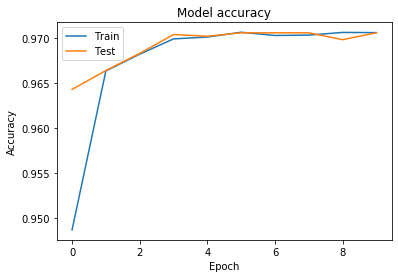

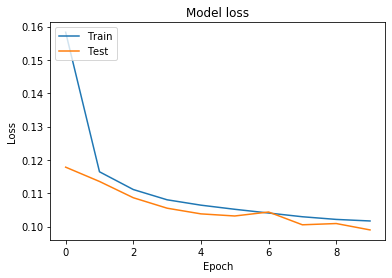

In [274]:
import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [80]:
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])